## Boosting
- Mirip dengan ensemble learning
- Setiap melakukan iterasi akan memperbaiki masalah (update)
- Base method : algoritma
- Bobot akan direvisi setiap iterasi
- Konsep boosting -> Deep Learning
- Tujuan : meningkatkan kepresisian dan akurasi model

### 1. Adaptive Boosting (AdaBoost)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
%matplotlib inline

In [4]:
data = pd.read_csv('pima-indians-diabetes.csv')

In [5]:
data.head()

,num_pregnant,plasma_conc,blood_pressure,tricep_thick,serum_insulin,BMI,d_pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   num_pregnant    768 non-null    int64  
 1   plasma_conc     768 non-null    int64  
 2   blood_pressure  768 non-null    int64  
 3   tricep_thick    768 non-null    int64  
 4   serum_insulin   768 non-null    int64  
 5   BMI             768 non-null    float64
 6   d_pedigree      768 non-null    float64
 7   age             768 non-null    int64  
 8   diabetes        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
x = data.drop('diabetes',axis=1)
y = data['diabetes']

In [9]:
y.value_counts()

0    500
1    268
Name: diabetes, dtype: int64

In [10]:
268/768

0.3489583333333333

### Adaboost

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

In [12]:
dtree = DecisionTreeClassifier()
adaboost = AdaBoostClassifier(base_estimator = dtree, algorithm = 'SAMME')

In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [14]:
dtree.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [15]:
adaboost.fit(xtrain, ytrain)

AdaBoostClassifier(algorithm='SAMME', base_estimator=DecisionTreeClassifier())

In [16]:
adaboost.estimator_weights_

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [17]:
print(classification_report(ytest, adaboost.predict(xtest)))

              precision    recall  f1-score   support

           0       0.74      0.71      0.72       150
           1       0.49      0.53      0.51        81

    accuracy                           0.65       231
   macro avg       0.62      0.62      0.62       231
weighted avg       0.65      0.65      0.65       231



In [18]:
print(classification_report(ytest, dtree.predict(xtest)))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74       150
           1       0.53      0.56      0.54        81

    accuracy                           0.67       231
   macro avg       0.64      0.64      0.64       231
weighted avg       0.67      0.67      0.67       231



### Tuning

In [20]:
dt = DecisionTreeClassifier()
ada = AdaBoostClassifier(base_estimator = dtree)

In [26]:
param = {
    'base_estimator__min_samples_split' : [i for i in range(1,5)],
    'base_estimator__min_samples_leaf' : [i for i in range(1,5)],
    'n_estimators' : [10,20,40,50],
    'learning_rate' : np.linspace(0.01, 0.1, 5) 
}

search = GridSearchCV(estimator = ada, param_grid = param, scoring = 'roc_auc', cv = 5)

In [27]:
search.fit(xtrain, ytrain)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_weight_boosting.py", line 134, in fit
    random_state)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_weight_boosting.py", line 513, in _boost_real
    es

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_weight_boosting.py", line 134, in fit
    random_state)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_weight_boosting.py", line 513, in _boost_real
    es

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_weight_boosting.py", line 134, in fit
    random_state)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_weight_boosting.py", line 513, in _boost_real
    es

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_weight_boosting.py", line 134, in fit
    random_state)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_weight_boosting.py", line 513, in _boost_real
    es

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_weight_boosting.py", line 134, in fit
    random_state)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_weight_boosting.py", line 513, in _boost_real
    es

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_weight_boosting.py", line 134, in fit
    random_state)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_weight_boosting.py", line 513, in _boost_real
    es

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_weight_boosting.py", line 134, in fit
    random_state)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_weight_boosting.py", line 513, in _boost_real
    es

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_weight_boosting.py", line 134, in fit
    random_state)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_weight_boosting.py", line 513, in _boost_real
    es

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_weight_boosting.py", line 134, in fit
    random_state)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_weight_boosting.py", line 513, in _boost_real
    es

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_weight_boosting.py", line 134, in fit
    random_state)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_weight_boosting.py", line 513, in _boost_real
    es

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_weight_boosting.py", line 134, in fit
    random_state)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_weight_boosting.py", line 513, in _boost_real
    es

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_weight_boosting.py", line 134, in fit
    random_state)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_weight_boosting.py", line 513, in _boost_real
    es

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
             param_grid={'base_estimator__min_samples_leaf': [1, 2, 3, 4],
                         'base_estimator__min_samples_split': [1, 2, 3, 4],
                         'learning_rate': array([0.01  , 0.0325, 0.055 , 0.0775, 0.1   ]),
                         'n_estimators': [10, 20, 40, 50]},
             scoring='roc_auc')

In [28]:
search.best_params_

{'base_estimator__min_samples_leaf': 3,
 'base_estimator__min_samples_split': 3,
 'learning_rate': 0.0325,
 'n_estimators': 50}

In [29]:
dtree = DecisionTreeClassifier(min_samples_leaf = 3, min_samples_split = 3)
adaboost = AdaBoostClassifier(base_estimator = dtree, learning_rate = 0.0325, n_estimators = 50, algorithm = 'SAMME')

In [31]:
dtree.fit(xtrain, ytrain)
adaboost.fit(xtrain, ytrain)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(min_samples_leaf=3,
                                                         min_samples_split=3),
                   learning_rate=0.0325)

In [35]:
pred = adaboost.predict(xtest)
pred1 = dtree.predict(xtest)

In [34]:
confusion_matrix(ytest, pred)

array([[119,  31],
       [ 32,  49]])

In [37]:
confusion_matrix(ytest, pred1)

array([[113,  37],
       [ 39,  42]])

In [40]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       150
           1       0.61      0.60      0.61        81

    accuracy                           0.73       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.73      0.73      0.73       231



In [39]:
print(classification_report(ytest, pred1))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75       150
           1       0.53      0.52      0.53        81

    accuracy                           0.67       231
   macro avg       0.64      0.64      0.64       231
weighted avg       0.67      0.67      0.67       231



## Latihan

In [194]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [195]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [197]:
df.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

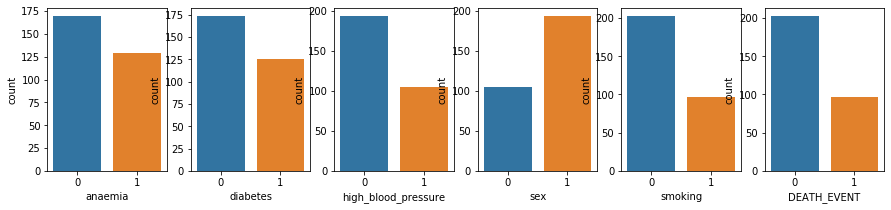

In [198]:
plt.figure(figsize=(15,3))
plt.subplot(1,6,1) 
sns.countplot(df['anaemia']) # lebih banyak no
plt.subplot(1,6,2)
sns.countplot(df['diabetes']) # lebih banyak no
plt.subplot(1,6,3)
sns.countplot(df['high_blood_pressure']) # lebih banyak no
plt.subplot(1,6,4)
sns.countplot(df['sex']) # lebih banyak man
plt.subplot(1,6,5)
sns.countplot(df['smoking']) # lebih banyak no
plt.subplot(1,6,6)
sns.countplot(df['DEATH_EVENT']) # lebih banyak no

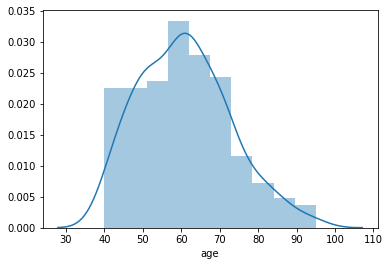

In [199]:
sns.distplot(df['age'])

In [201]:
x = df.drop('DEATH_EVENT',axis=1)
y = df['DEATH_EVENT']

In [202]:
y.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [203]:
203/(203+96) * 100

67.89297658862876

In [204]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 101)

### Logistic Regression

In [205]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(xtrain, ytrain)

LogisticRegression()

In [206]:
pred_log = logmodel.predict(xtest)

In [207]:
confusion_matrix(ytest, pred_log)

array([[58,  4],
       [10, 18]])

In [208]:
accuracy_score(ytest, pred_log)

0.8444444444444444

In [209]:
print(classification_report(ytest, pred_log))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89        62
           1       0.82      0.64      0.72        28

    accuracy                           0.84        90
   macro avg       0.84      0.79      0.81        90
weighted avg       0.84      0.84      0.84        90



### Logit

In [210]:
import statsmodels.api as sm
logit = sm.Logit(ytrain, sm.add_constant(xtrain))

In [211]:
hasil = logit.fit()

Optimization terminated successfully.
         Current function value: 0.383893
         Iterations 7


In [212]:
hasil.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            DEATH_EVENT   No. Observations:                  209
Model:                          Logit   Df Residuals:                      196
Method:                           MLE   Df Model:                           12
Date:                Wed, 19 Aug 2020   Pseudo R-squ.:                  0.3915
Time:                        15:10:35   Log-Likelihood:                -80.234
converged:                       True   LL-Null:                       -131.85
Covariance Type:            nonrobust   LLR p-value:                 1.297e-16
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        3.6345      6.863      0.530      0.596      -9.816      17.085
age                          0.0513      0.019      2.679      0.007       0.014       0.089
anaemia                      0.3695      0.417      0.887      0.375      -0.447       1.186
creatinine_phosphokinase     0.0003      0.000      1.412      0.158      -0.000       0.001
diabetes                     0.1432      0.408      0.351      0.726      -0.657       0.943
ejection_fraction           -0.0616      0.017     -3.522      0.000      -0.096      -0.027
high_blood_pressure         -0.1104      0.421     -0.262      0.793      -0.935       0.715
platelets                   5.8e-07   2.19e-06      0.265      0.791   -3.72e-06    4.88e-06
serum_creatinine             0.5796      0.191      3.032      0.002       0.205       0.954
serum_sodium                -0.0298      0.048     -0.624      0.532      -0.123       0.064
sex                         -0.6746      0.486     -1.388      0.165      -1.627       0.278
smoking                      0.6018      0.489      1.231      0.218      -0.356       1.560
time                        -0.0203      0.004     -5.598      0.000      -0.027      -0.013
============================================================================================
"""

In [213]:
logit_fix = sm.Logit(ytrain, sm.add_constant(xtrain[['age','ejection_fraction','serum_creatinine','time']]))
hasil_fix = logit_fix.fit()
hasil_fix.summary()

Optimization terminated successfully.
         Current function value: 0.396480
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            DEATH_EVENT   No. Observations:                  209
Model:                          Logit   Df Residuals:                      204
Method:                           MLE   Df Model:                            4
Date:                Wed, 19 Aug 2020   Pseudo R-squ.:                  0.3715
Time:                        15:10:36   Log-Likelihood:                -82.864
converged:                       True   LL-Null:                       -131.85
Covariance Type:            nonrobust   LLR p-value:                 2.668e-20
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1604      1.247      0.129      0.898      -2.284       2.605
age                   0.0463      0.018      2.622      0.009       0.012       0.081
ejection_fraction    -0.0612      0.017     -3.623      0.000      -0.094      -0.028
serum_creatinine      0.5847      0.181      3.222      0.001       0.229       0.940
time                 -0.0208      0.003     -5.951      0.000      -0.028      -0.014
=====================================================================================
"""

In [214]:
logmodel_fix = LogisticRegression()
logmodel_fix.fit(xtrain[['age','ejection_fraction','serum_creatinine','time']], ytrain)

LogisticRegression()

In [215]:
pred_logit = logmodel_fix.predict(xtest[['age','ejection_fraction','serum_creatinine','time']])

In [216]:
confusion_matrix(ytest, pred_logit)

array([[56,  6],
       [ 8, 20]])

In [217]:
accuracy_score(ytest, pred_logit)

0.8444444444444444

In [218]:
print(classification_report(ytest, pred_logit))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        62
           1       0.77      0.71      0.74        28

    accuracy                           0.84        90
   macro avg       0.82      0.81      0.81        90
weighted avg       0.84      0.84      0.84        90



### Decision Tree

In [219]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [220]:
dtree.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [221]:
pred_dt = dtree.predict(xtest)

In [222]:
confusion_matrix(ytest, pred_dt)

array([[49, 13],
       [11, 17]])

In [223]:
accuracy_score(ytest, pred_dt)

0.7333333333333333

### Decision Tree AdaBoost

In [224]:
from sklearn.ensemble import AdaBoostClassifier

In [225]:
ad_dt = AdaBoostClassifier(base_estimator = dtree, algorithm = 'SAMME')

In [226]:
ad_dt.fit(xtrain, ytrain)

AdaBoostClassifier(algorithm='SAMME', base_estimator=DecisionTreeClassifier())

In [227]:
pred_ad_dt = ad_dt.predict(xtest)

In [228]:
confusion_matrix(ytest, pred_ad_dt)

array([[50, 12],
       [10, 18]])

In [229]:
accuracy_score(ytest, pred_ad_dt)

0.7555555555555555

### Random Forest

In [230]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [231]:
rfc.fit(xtrain, ytrain)

RandomForestClassifier()

In [232]:
pred_rfc = rfc.predict(xtest)

In [233]:
confusion_matrix(ytest, pred_rfc)

array([[55,  7],
       [ 8, 20]])

In [234]:
accuracy_score(ytest, pred_rfc)

0.8333333333333334

### Random Forest AdaBoost

In [235]:
ad_rfc = AdaBoostClassifier(base_estimator = rfc, algorithm = 'SAMME')

In [236]:
ad_rfc.fit(xtrain, ytrain)

AdaBoostClassifier(algorithm='SAMME', base_estimator=RandomForestClassifier())

In [237]:
pred_ad_rfc = ad_rfc.predict(xtest)

In [238]:
confusion_matrix(ytest, pred_ad_rfc)

array([[56,  6],
       [ 7, 21]])

In [239]:
accuracy_score(ytest, pred_ad_rfc)

0.8555555555555555

### Random Forest AdaBoost Tuning

In [243]:
rfct = RandomForestClassifier()
adbt = AdaBoostClassifier(base_estimator = rfct)

In [1]:
param = {
    'base_estimator__min_samples_split' : [5,10,20],
    'n_estimators' : [10,20,40],
    'learning_rate' : np.linspace(0.01, 0.1, 5) 
}

search = GridSearchCV(estimator = adbt, param_grid = param, scoring = 'roc_auc', cv = 5, n_jobs = -1)

NameError: name 'GridSearchCV' is not defined

In [265]:
search.fit(xtrain, ytrain)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=RandomForestClassifier()),
             n_jobs=-1,
             param_grid={'base_estimator__min_samples_split': [5, 10, 20],
                         'learning_rate': array([0.01  , 0.0325, 0.055 , 0.0775, 0.1   ]),
                         'n_estimators': [10, 20, 40]},
             scoring='roc_auc')

In [266]:
search.best_params_

{'base_estimator__min_samples_split': 5,
 'learning_rate': 0.1,
 'n_estimators': 10}

In [267]:
rfct = RandomForestClassifier(min_samples_split = 5)
adbt = AdaBoostClassifier(base_estimator = rfct, learning_rate = 0.1, n_estimators = 10, algorithm = 'SAMME')

In [268]:
rfct.fit(xtrain, ytrain)
adbt.fit(xtrain, ytrain)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=RandomForestClassifier(min_samples_split=5),
                   learning_rate=0.1, n_estimators=10)

In [269]:
pred_rfct = rfct.predict(xtest)
pred_adbt = adbt.predict(xtest)

In [270]:
confusion_matrix(ytest, pred_rfct)

array([[57,  5],
       [ 7, 21]])

In [271]:
accuracy_score(ytest, pred_rfct)

0.8666666666666667

In [272]:
confusion_matrix(ytest, pred_adbt)

array([[55,  7],
       [ 6, 22]])

In [273]:
accuracy_score(ytest, pred_adbt)

0.8555555555555555

### Predict New Data

In [275]:
new_data = pd.read_excel('new data.xlsx')

In [276]:
new_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,74,1,3793,0,41,1,672709,4,133,0,0,77
1,50,1,6290,1,40,1,325364,4,141,1,0,248
2,63,0,2813,0,35,0,350068,5,135,0,1,142
3,68,1,81,1,36,0,597305,3,128,0,1,26
4,62,1,2820,1,57,1,421481,4,145,0,0,123


In [277]:
rfct.fit(xtrain, ytrain)

RandomForestClassifier(min_samples_split=5)

In [290]:
pred_new = rfct.predict(new_data)
pred_new

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [289]:
pd.Series(pred_new).value_counts()

0    46
1    30
dtype: int64